# TP3: Machine Learning

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [7]:
import pickle

## Análisis Univariado

In [102]:
def roc_univariado(valores, etiquetas, etiqueta_true):
    """
    Args:
        valores valores del feature de interes
        etiquetas etiquetas para cada valor
        etiqueta_true etiqueta a la que corresponde cuando el valore es mayor al umbral
        
    Returns:
        umbrales
        tprs
        fprs
    """
    m = min(valores)
    M = max(valores)
    n = 100
    xs = np.linspace(m, M, n)
    tprs = []
    fprs = []
    for idx in range(n):
        ts = np.array((valores > xs[idx]).values)
        
        tp = np.sum(etiquetas[ts] == etiqueta_true)
        fp = np.sum(etiquetas[ts] != etiqueta_true)
        tn = np.sum(etiquetas[np.invert(ts)] != etiqueta_true)
        fn = np.sum(etiquetas[np.invert(ts)] == etiqueta_true)
        
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        
        tprs.append(tpr)
        fprs.append(fpr)
        
    tprs = np.array(tprs)
    fprs = np.array(fprs)

    bases = (tprs[1:] - tprs[:-1])
    print(tprs[1:], tprs[:-1])
    aroc = np.sum(fprs[:-1] * bases)
        
    return (xs, tprs, fprs, aroc)

### Alpha

In [19]:
with open('pickles/band_power_mean.pkl', 'rb') as f:
    band_means = pickle.load(f)

In [30]:
etiquetas = np.array(['P'] * 10 + ['S'] * 10)

In [103]:
xs, tprs, fprs, aroc = roc_univariado(band_means['alpha'], etiquetas, 'S')

[ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9  0.9  0.8
  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.7  0.7  0.7  0.7  0.7  0.7
  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.2  0.2  0.2  0.2  0.2  0.2  0. ] [ 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.9  0.9
  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.7  0.7  0.7  0.7  0.7
  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.7  0.6  0.6  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.4  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2 

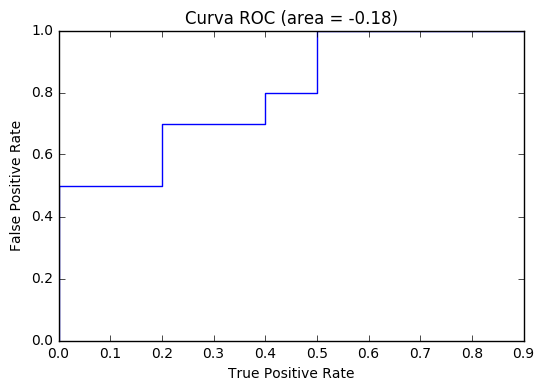

In [99]:
plot(fprs, tprs)
xlabel('True Positive Rate')
ylabel('False Positive Rate')
title('Curva ROC (area = {:.2f})'.format(aroc))